In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

In [11]:
data_set_contaminantes = pd.read_csv('../../../data/processed/normalizados/Dataset_MinMax.csv',sep=';',decimal=',')
data_set_contaminantes= data_set_contaminantes.drop(['mes','dia','fecha','year'],axis=1)
data_set_contaminantes.head()

,pm2.5,pm10,humedad,puntoRocio,temperatura,dir_viento,viento,precipitacion,AQI,calidad_aire,estacion,mes_sin,mes_cos,dia_sin,dia_cos,dir_viento_sin,dir_viento_cos
0,0.0443,0.1004,0.2366,0.6306,0.8301,0.4888,0.1680,0.0,0.0668,Bueno,0.0,0.75,0.933,0.6008,0.9897,0.5469,0.0022
1,0.0678,0.1571,0.2153,0.7204,0.8548,0.7212,0.1680,0.0,0.0972,Moderado,0.0,0.75,0.933,0.6974,0.9594,0.0145,0.3806
2,0.0597,0.1212,0.4858,0.7776,0.7089,0.5984,0.1195,0.0,0.0911,Moderado,0.0,0.75,0.933,0.7860,0.9102,0.2271,0.0811
3,0.0620,0.1418,0.5667,0.7837,0.6561,0.4318,0.1195,0.0,0.0931,Moderado,0.0,0.75,0.933,0.8629,0.8441,0.7143,0.0483
4,0.0407,0.1061,0.3569,0.7302,0.7754,0.6620,0.1755,0.0,0.0607,Bueno,0.0,0.75,0.933,0.9249,0.7639,0.0884,0.2161


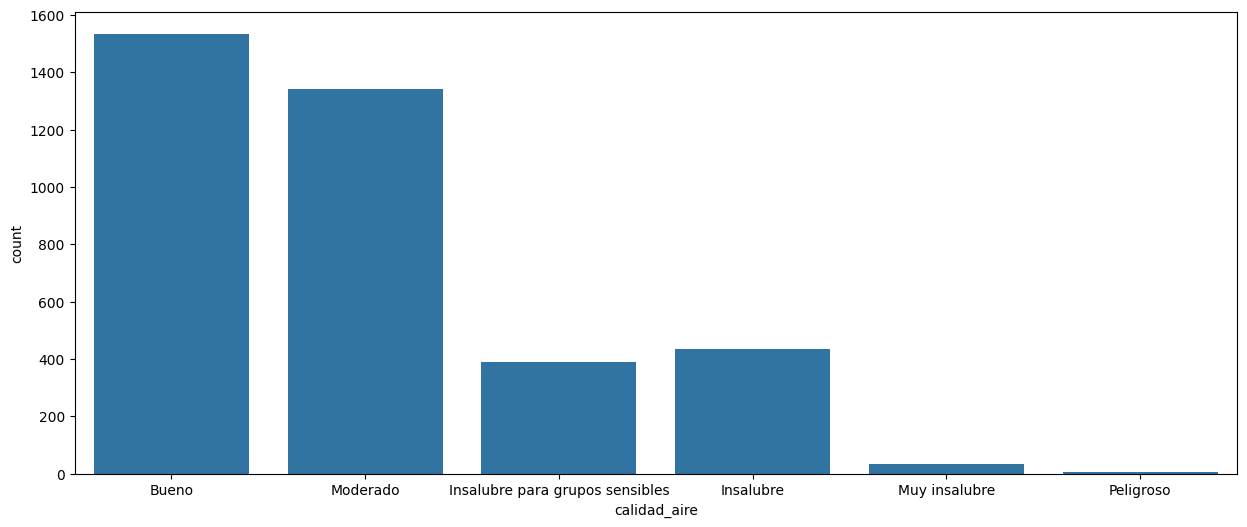

In [12]:
# Ejemplo de ajuste de tamaño del gráfico
plt.figure(figsize=(15, 6))
sns.countplot(x=data_set_contaminantes["calidad_aire"])
plt.show()


In [13]:
data_set_contaminantes['calidad_aire_shifted'] = data_set_contaminantes['calidad_aire'].shift(-2)

def asignar_calidad(row):
    if row['calidad_aire_shifted'] == 'Bueno':
        return 'yes'
    else:
        return 'no'

data_set_contaminantes['goodAirAfterTomorrow'] = data_set_contaminantes.apply(lambda row: asignar_calidad(row), axis=1)

data_set_contaminantes = data_set_contaminantes.drop('calidad_aire_shifted', axis=1)

def asignar_calidad_hoy(row):
    if row['calidad_aire'] == 'Bueno': 
        return 'yes'
    else:
        return 'no'

data_set_contaminantes['goodAirToday'] = data_set_contaminantes.apply(lambda row: asignar_calidad_hoy(row), axis=1)



data_set_contaminantes.head()

,pm2.5,pm10,humedad,puntoRocio,temperatura,dir_viento,viento,precipitacion,AQI,calidad_aire,estacion,mes_sin,mes_cos,dia_sin,dia_cos,dir_viento_sin,dir_viento_cos,goodAirAfterTomorrow,goodAirToday
0,0.0443,0.1004,0.2366,0.6306,0.8301,0.4888,0.1680,0.0,0.0668,Bueno,0.0,0.75,0.933,0.6008,0.9897,0.5469,0.0022,no,yes
1,0.0678,0.1571,0.2153,0.7204,0.8548,0.7212,0.1680,0.0,0.0972,Moderado,0.0,0.75,0.933,0.6974,0.9594,0.0145,0.3806,no,no
2,0.0597,0.1212,0.4858,0.7776,0.7089,0.5984,0.1195,0.0,0.0911,Moderado,0.0,0.75,0.933,0.7860,0.9102,0.2271,0.0811,yes,no
3,0.0620,0.1418,0.5667,0.7837,0.6561,0.4318,0.1195,0.0,0.0931,Moderado,0.0,0.75,0.933,0.8629,0.8441,0.7143,0.0483,yes,no
4,0.0407,0.1061,0.3569,0.7302,0.7754,0.6620,0.1755,0.0,0.0607,Bueno,0.0,0.75,0.933,0.9249,0.7639,0.0884,0.2161,yes,yes


<Axes: xlabel='goodAirAfterTomorrow', ylabel='count'>

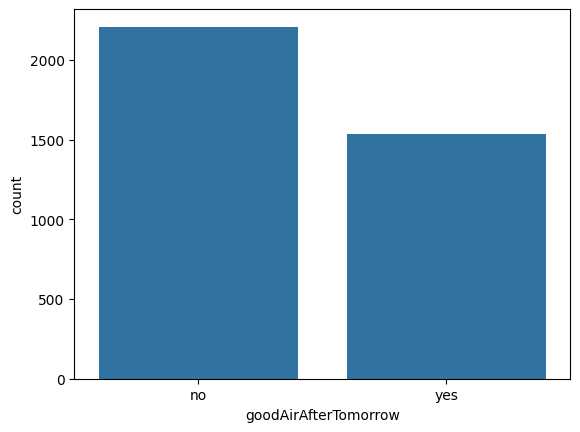

In [14]:
sns.color_palette()
sns.countplot(x= data_set_contaminantes["goodAirAfterTomorrow"])

In [15]:
data_set_contaminantes['goodAirToday'] = data_set_contaminantes['goodAirToday'].map({'yes': 1, 'no': 0})
data_set_contaminantes['goodAirAfterTomorrow'] = data_set_contaminantes['goodAirAfterTomorrow'].map({'yes': 1, 'no': 0})
data_set_contaminantes.head()

,pm2.5,pm10,humedad,puntoRocio,temperatura,dir_viento,viento,precipitacion,AQI,calidad_aire,estacion,mes_sin,mes_cos,dia_sin,dia_cos,dir_viento_sin,dir_viento_cos,goodAirAfterTomorrow,goodAirToday
0,0.0443,0.1004,0.2366,0.6306,0.8301,0.4888,0.1680,0.0,0.0668,Bueno,0.0,0.75,0.933,0.6008,0.9897,0.5469,0.0022,0,1
1,0.0678,0.1571,0.2153,0.7204,0.8548,0.7212,0.1680,0.0,0.0972,Moderado,0.0,0.75,0.933,0.6974,0.9594,0.0145,0.3806,0,0
2,0.0597,0.1212,0.4858,0.7776,0.7089,0.5984,0.1195,0.0,0.0911,Moderado,0.0,0.75,0.933,0.7860,0.9102,0.2271,0.0811,1,0
3,0.0620,0.1418,0.5667,0.7837,0.6561,0.4318,0.1195,0.0,0.0931,Moderado,0.0,0.75,0.933,0.8629,0.8441,0.7143,0.0483,1,0
4,0.0407,0.1061,0.3569,0.7302,0.7754,0.6620,0.1755,0.0,0.0607,Bueno,0.0,0.75,0.933,0.9249,0.7639,0.0884,0.2161,1,1


In [16]:
X = data_set_contaminantes.drop(["goodAirAfterTomorrow","calidad_aire"], axis=1)
y = data_set_contaminantes["goodAirAfterTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('x.shape',X.shape)

x.shape (3742, 17)


In [17]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # cantidad mínima de cambio para contar como una mejora
    patience=20, # cuántas épocas esperar antes de detener
    restore_best_weights=True,
)
 
model = Sequential()


model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
# model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2, verbose=0)

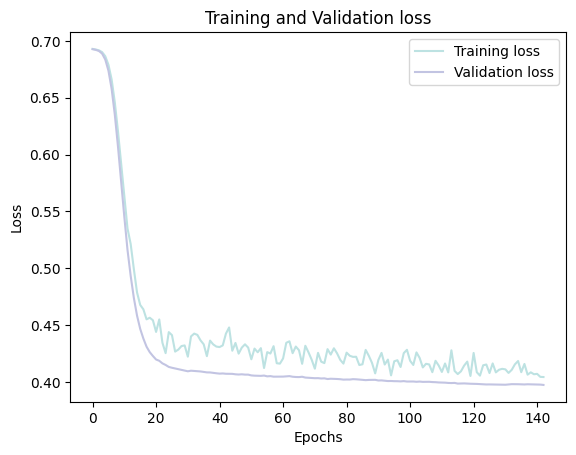

In [18]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

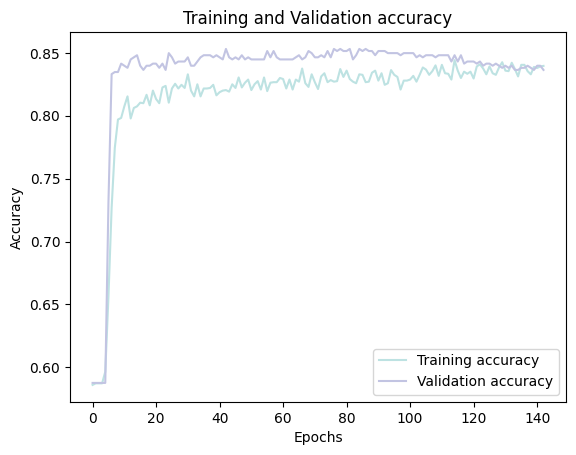

In [19]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

24/24 [==============================] - 0s 829us/step


<Axes: >

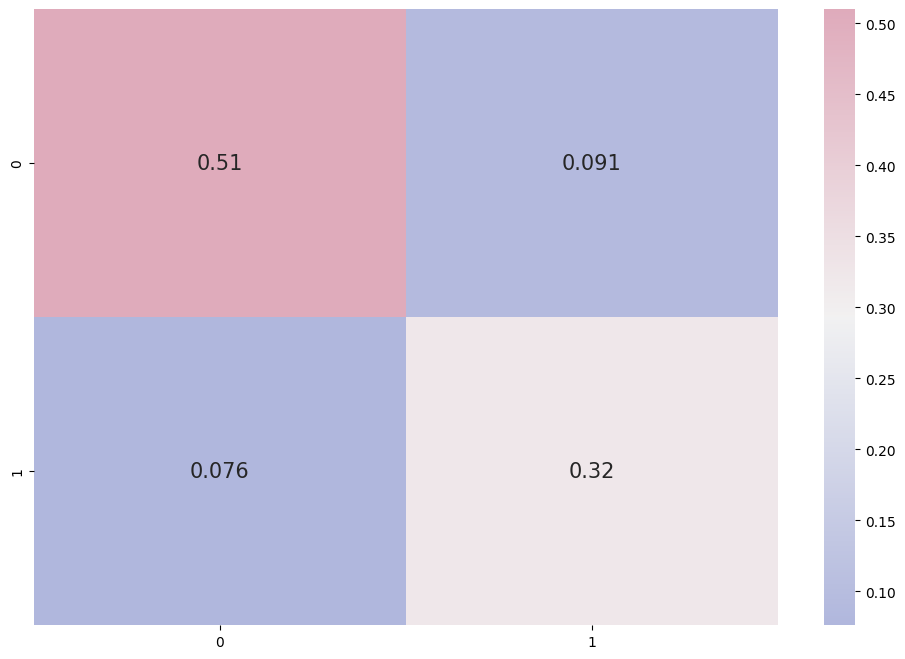

In [21]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [22]:
print(cf_matrix)

[[382  68]
 [ 57 242]]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       450
           1       0.78      0.81      0.79       299

    accuracy                           0.83       749
   macro avg       0.83      0.83      0.83       749
weighted avg       0.83      0.83      0.83       749

